'../results/animations/dance_animation.gif'

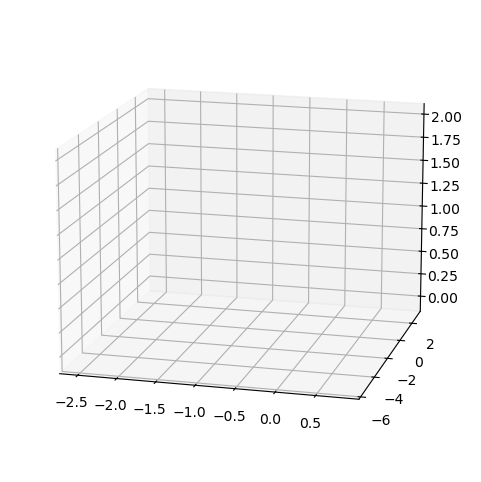

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

data = np.load("../data/mariel_honey.npy")
n_joints, n_frames, _ = data.shape

data[..., 2] = -data[..., 2]

foot_idx = 0
z_foot_min = data[foot_idx, :, 2].min()
data[..., 2] -= z_foot_min  

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = data[:, :, 0].min(), data[:, :, 0].max()
y_min, y_max = data[:, :, 1].min(), data[:, :, 1].max()
z_min, z_max = data[:, :, 2].min(), data[:, :, 2].max()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.view_init(elev=15, azim=-75)

points, = ax.plot([], [], [], 'ro', markersize=3)
skeleton = [(i, i+1) for i in range(n_joints - 1)]
lines = [ax.plot([], [], [], 'k-', linewidth=1)[0] for _ in skeleton]

def init():
    points.set_data([], [])
    points.set_3d_properties([])
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])
    return [points] + lines

def update(frame):
    x = data[:, frame, 0]
    y = data[:, frame, 1]
    z = data[:, frame, 2]
    
    points.set_data(x, y)
    points.set_3d_properties(z)
    
    for line, (i, j) in zip(lines, skeleton):
        line.set_data([x[i], x[j]], [y[i], y[j]])
        line.set_3d_properties([z[i], z[j]])
        
    return [points] + lines

gif_output_path = "../results/animations/dance_animation.gif"
ani = FuncAnimation(fig, update, frames=300, init_func=init, interval=30, blit=False)
ani.save(gif_output_path, writer=PillowWriter(fps=30))

gif_output_path
